# Домашнее задание 1
## Harry Potter and the Action Prediction Challenge from Natural Language


В этом домашнем задании вы будете работать с корпусом Harry Potter and the Action Prediction Challenge. Корпус собран из фанфиков о Гарри Поттере и состоит из двух частей: 1) сырые тексты, 2) фрагменты текстов, описывающих ситуацию, в которой произнесено заклинание.

Корпус описан в статье: https://arxiv.org/pdf/1905.11037.pdf

David Vilares and Carlos Gómez-Rodríguez. Harry Potter and the Action Prediction Challenge from Natural Language. 2019 Annual Conference of the North American Chapter of the Association for Computational Linguistics. To appear.

Код для сбора корпуса находится в репозитории: https://github.com/aghie/hpac . Корпус можно скачать по инструкции из этого репозитория, но для экономии времени авторы задания уже скачали и подготовили данные к работе. 

Ссылки на собранный корпус: 
* Сырые тексты:  https://www.dropbox.com/s/12toaj67fjrguhd/hpac_raw.zip?dl=0
* Токенизированные тексты в нижнем регистре: https://www.dropbox.com/s/1ndto6dce5wg7j2/hpac_lower_tokenized.zip?dl=0
* train-test-dev: https://www.dropbox.com/s/ftinwwjfyydevth/hpac_splits.zip?dl=0

Части 1, 2 задания должны быть выполнены на полных текстах (сырых или предобработанных -- на ваше усмотрение), Часть 3 – на разбиение на тестовое, отладочное и обучающее множества. Тестовое множество должно быть использовано исключительно для тестирования моделей, обучающее и отладочное – для выбора модели и параметров. 

В статье и репозитории вы найдете идеи, которые помогут вам выполнить домашнее задание. Их стоит воспринимать как руководство к действию, и не стоит их копировать и переиспользовать. Обученные модели использовать не нужно, код для их обучения можно использовать как подсказку. 

## ПРАВИЛА
1. Домашнее задание выполняется индивидуально.
2. Домашнее задание сдается в системе Anytask, куда можно попасть через инвайт.
3. Домашнее задание оформляется в отчета в ipython-тетрадке. 
4. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
5. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
6. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 

## Часть 4. [0.5 балла] Итоги
Напишите краткое резюме проделанной работы. Читали ли вы сами Гарри Поттера или фанфики о нем и помогло ли вам знание предметной области в выполнении домашнего задания?

## Бонусная часть. [2 балла] Skip-Gram Negative Sampling
Самостоятельно реализовать и обучить модель Skip-Gram Negative Sampling. Продемонстрировать качество полученных представлений на конкретный примерах.

# Imports

In [342]:
import os
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Данные
Сырые тексты 

In [3]:
# !unzip hpac_source

In [4]:
# !ls hpac_source | wc -l

In [5]:
# !unzip hpac_splits

In [648]:
# !head -n 3 hpac_splits/hpac_training_128.tsv

train, test, dev файлы

In [642]:
training = pd.read_csv('hpac_splits/hpac_training_128.tsv', sep = '\t', header = None)
test = pd.read_csv('hpac_splits/hpac_test_128.tsv', sep = '\t', header = None)
dev = pd.read_csv('hpac_splits/hpac_dev_128.tsv', sep = '\t', header = None)

In [681]:
training.head(2)

,0,1,2
0,7642954.0.676,RIDDIKULUS,were staring at her . she was up next to face ...
1,10443333.0.5753,RIDDIKULUS,"that whole time . her first reaction , for whi..."


In [656]:
l = list(set(training[2].unique()).intersection(test[2].unique()))

len(l)

32

In [659]:
l[5]

"bonded to the chair with a sticking charm . molly was mumbling . . `` ts only a little potion , what 's the harm '' arthur and percy were staring at her in shock . ron and ginny were agape , staring at hermione who was nestled in harry 's arms . . `` lady potter ? '' was running through their minds . . `` ronald weasley , look at me . '' shacklebolt was standing over ron , who was at this time able to move his head . his mouth moved , but he was still silenced . `` i am going to clean you up and repair your injuries , nod if you understand '' ron sullenly nodded . shacklebolt did a quick"

In [665]:
# l = list(set(training[0].unique()).intersection(test[0].unique()))

# len(l)

In [663]:
# test[test[2].isin(l)]

In [664]:
# training[training[2].isin(l)]

In [428]:
training['sample'] = 'train'
test['sample'] = 'test'
dev['sample'] = 'dev'

In [429]:
df = pd.concat([training, test, dev])

In [431]:
# del training, test, dev

In [331]:
df.iloc[0][1], df.iloc[0][2]

('RIDDIKULUS',
 "were staring at her . she was up next to face the boggart in defense against the dark arts class . she was not scared , but what she was worried about was what had happened with lysander . she looked up at the boggart in front of her which had previously been a humongous spider . its eyes locked on her . before she could think of what frightened her , the spider transformed into lysander . he was dying . there were giggles coming from the male and female hufflepuff students . there was a smirk on lorcan 's face . `` lily help me '' i ca n't fail this class because of a secret love . lily lifted her wand and said , ``")

# Часть 1. [1 балл] Эксплоративный анализ 

[бонус] Постройте тематическую модель по корпусу HPAC.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для фанфиков или фентези-тематики)


## 1. Найдите топ-1000 слов по частоте без учета стоп-слов.

from collections import Counter 

In [141]:
from collections import Counter
import nltk
import ssl

# фиксим траблы с сертификатами
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruattar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
all_text = ' '.join(df[2].to_list())

In [221]:
sw_filter_func = lambda x: x not in stopwords and x.isalpha()

In [222]:
word_cnt = Counter(filter(sw_filter_func, all_text.split(' ')))

In [11]:
commom_1000 = word_cnt.most_common(1000)

In [12]:
commom_1000[:5]

[('harry', 59043),
 ('wand', 42489),
 ('said', 29459),
 ('could', 28027),
 ('would', 25913)]

## 2 Найдите топ-10 по частоте: имен, пар имя + фамилия

Распарсим имена

https://gist.github.com/jennynz/7eaf7ea4eeb3d686b19e997e721bda0c

In [114]:
# list(filter(lambda x: x[0] in ('mr', 'mrs', 'ms', 'miss'), word_cnt.items()))

In [13]:
with open('Harry Potter names', 'r') as f:
    namelines = f.read().split('\n')

In [14]:
def parse_namelist(s):
    resdict = {
        'name': None,
        'surname': None,
        'middlename': None,
        'title': None,
    }

    if len(s) == 0:
        return resdict
    
    l = s.lower().split(' ')

    if len(l) == 1:
        resdict['name'] = resdict['surname'] = l[0]
        
    elif len(l) > 1:
        
        if l[0] in ('mr', 'miss', 'mrs', 'ms', 'lord'):
            resdict['title'] = l[0]
            l = l[1:]
        
        resdict['name'] = l[0]    
        resdict['surname'] = l[-1]
        
    if len(l) > 2:
        resdict['middlename'] = ' '.join(l[1:-1])
        
    return resdict

In [455]:
parsed_names = pd.DataFrame(map(parse_namelist, namelines))

new_row = {
    'name': 'ginny',
    'surname': "weasley",
    'middlename': None,
    'title': None,
}

parsed_names = parsed_names._append(new_row, ignore_index=True)

In [28]:
names = parsed_names.name.unique()

In [31]:
popular_names = sorted(
    list(filter(lambda x: x[0] in names, word_cnt.items())),
    key=lambda x: x[1],
    reverse=True
)

Топ популярных имен:

In [33]:
popular_names[:5]

[('harry', 59043),
 ('hermione', 24062),
 ('draco', 21266),
 ('voldemort', 16091),
 ('sirius', 9929)]

Ищем имя + фамилия

In [51]:
import re
text = df[df[2].str.contains('harry potter')].iloc[19, 2]
re.findall('harry potter', text)

['harry potter']

In [106]:
import re  
from collections import defaultdict
from typing import List
  
def count_mentions(names: List[str], text: str, mentions: defaultdict):
    """  
    Считает количество упоминаний имен и фамилий в тексте и добавляет их в mentions  
  
    Args:  
        names (list): Список строк вида "имя фамилия".  
        text (str): Текст, в котором нужно найти упоминания.  
        mentions (defaultdict): словарь счетчик
    Returns:  None  
    """  
    for name in tqdm_notebook(names):  
        pattern = re.compile(r'\b' + re.escape(name) + r'\b', re.IGNORECASE)  
        mentions[name] += len(pattern.findall(text))   

Так, упоминание имя + фамилия это подможество упоминаний имени, поэтому чтобы не искать по всем именам и фамилиям, можем список name_surname_lst фильтрануть на топ имен

In [121]:
top_30_names = [i[0] for i in popular_names[:30]]

In [130]:
name_surname_df = parsed_names.query("name.isin(@top_30_names)")
name_surname_lst = sorted(
    list(
        set(
            name_surname_df['name'] + ' ' + name_surname_df['surname'].str.replace(')', '')
        )
    )
)

In [133]:
len(name_surname_lst)

40

In [105]:
# from tqdm import tqdm_notebook

# for _, row in tqdm_notebook(df.iterrows()):
#     count_mentions(name_surname_lst, row[2], MENTIONS)

In [136]:
MENTIONS = defaultdict(int)

count_mentions(name_surname_lst, all_text, MENTIONS)

/var/folders/yh/4jky_nln065c8nrzc6phgjjdt0k6bs/T/ipykernel_69006/1668062734.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name in tqdm_notebook(names):


  0%|          | 0/40 [00:00<?, ?it/s]

In [140]:
sorted(list(MENTIONS.items()), key=lambda x: x[1], reverse=True)[:10]

[('harry potter', 3178),
 ('draco malfoy', 1058),
 ('james potter', 762),
 ('severus snape', 713),
 ('hermione granger', 634),
 ('lucius malfoy', 629),
 ('sirius black', 499),
 ('albus dumbledore', 378),
 ('remus lupin', 290),
 ('lily evans', 266)]

<!-- ## [bonus] Постройте тематическую модель по корпусу HPAC. -->

# Часть 2. [2 балла] Модели представления слов 
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса HPAC.

In [144]:
# !pip install gensim

In [145]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

In [520]:
# data_tok = [tokenizer.tokenize(x[1][2]) for x in df.iterrows()]

data_tok = [
    list(filter(sw_filter_func, tokenizer.tokenize(x[1][2].lower())))
    for x in df.iterrows()
]

In [228]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok,
                 vector_size=32,      # embedding vector size
                 min_count=10,  # consider words that occured at least 5 times
                 window=5).wv

## 1. Продемонстрируйте, как работает поиск

Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели. 

Похожие слова находятся неплохо: для Гарри получаем имена других волшебников, для заклинания - синонимы слова и частные применения заклинаний (shield, patronus)

In [232]:
model.most_similar('harry')

[('hermione', 0.7381895780563354),
 ('ron', 0.7332048416137695),
 ('draco', 0.6951807141304016),
 ('ginny', 0.6894742846488953),
 ('cedric', 0.6752374768257141),
 ('finally', 0.6291574835777283),
 ('voldemort', 0.5753096342086792),
 ('soon', 0.5702435374259949),
 ('alicia', 0.5685431361198425),
 ('alex', 0.566909670829773)]

In [231]:
model.most_similar('spell')

[('charm', 0.8001124262809753),
 ('jinx', 0.7807850241661072),
 ('curse', 0.7784588932991028),
 ('stunner', 0.7772358059883118),
 ('spells', 0.7618021965026855),
 ('hex', 0.696738600730896),
 ('incantation', 0.6952868700027466),
 ('target', 0.6668296456336975),
 ('distraction', 0.6603333950042725),
 ('instinct', 0.6571776270866394)]

`doesnt_match` возвращает слово, которое не имеет близких значений или ассоциаций с другими словами в списке. 

И как мы видим, выведенные слова действительно есть в вокабуляре word2vec'a, т. е. дело именно в отсутствии ассоциаций

In [233]:
model.doesnt_match(['marriage', 'harry', 'ron', 'draco', 'fight'])

'marriage'

In [234]:
'marriage' in model.key_to_index

True

In [235]:
model.doesnt_match(['spell', 'incantation', 'patronus', 'hex', 'refrigerator'])

'refrigerator'

In [236]:
'refrigerator' in model.key_to_index

True

теперь поскладываем векторы

Думаю Драко Малфой кайфанул бы с результатов следующей ячейки

In [244]:
model.most_similar(positive=["faculty", "bravery"], negative=["brain"])

[('glory', 0.812431812286377),
 ('champion', 0.8022547960281372),
 ('rival', 0.8000054955482483),
 ('muggleborn', 0.7925584316253662),
 ('officially', 0.7901118397712708),
 ('heirs', 0.7778529524803162),
 ('supporter', 0.7679476737976074),
 ('meddling', 0.7676731944084167),
 ('sorted', 0.7676534056663513),
 ('united', 0.758999764919281)]

минутка экзистенциального

In [245]:
model.most_similar(positive=["love", "pain"])

[('misery', 0.800972580909729),
 ('hurts', 0.723066508769989),
 ('excruciating', 0.7141058444976807),
 ('agony', 0.702722430229187),
 ('hate', 0.6998796463012695),
 ('pride', 0.6943086385726929),
 ('regret', 0.6906284689903259),
 ('sorrow', 0.6880046129226685),
 ('hurting', 0.6824453473091125),
 ('forever', 0.6800863742828369)]

## 2. Порисуем

2. Визуализируйте топ-1000 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

In [266]:
words = model.index_to_key[:1000]

word_vectors = np.array([model.get_vector(x) for x in words])

In [255]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

In [267]:
# ## pca интереса ради

# pca = PCA(n_components=2)
# word_vectors_pca = pca.fit_transform(word_vectors)

# scaler = StandardScaler()
# word_vectors_pca = scaler.fit_transform(word_vectors_pca)

# draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words);

все правда, лучше не думать

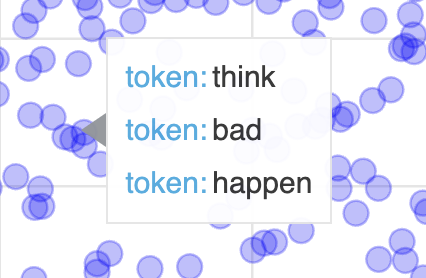

**TSNE**

In [261]:
tsne = TSNE(n_components=2, random_state=45, n_iter=5000)
word_tsne = tsne.fit_transform(word_vectors)

scaler = StandardScaler()
word_tsne = scaler.fit_transform(word_tsne)

In [370]:
# draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='pink', token=words);

получили например кластер векторов для измерения времени, неплохо

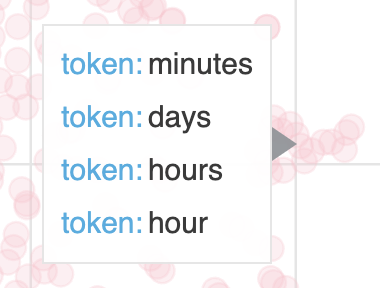

или вот, уголочек Володи

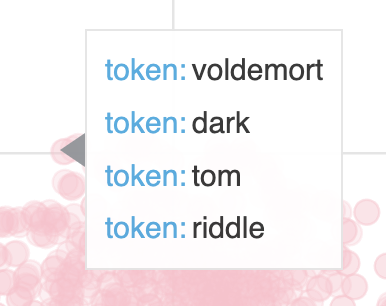

# Часть 3. [6.5 баллов] Классификация текстов
Задача классификации формулируется так: данный фрагмент фанфика описывают какую-то ситуацию, которая предшествует произнесению заклинания. Требуется по тексту предсказать, какое именно заклинание будет произнесено. Таким образом, заклинание - это фактически метка класса. Основная мера качества – macro $F_1$.
Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на частых и редких классах. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом заклинаний?

Используйте фрагменты из множества train для обучения, из множества dev для отладки, из множества test – для тестирования и получения итоговых результатов. 

<!-- 1. [1 балл] Используйте fastText в качестве baseline-классификатора. -->
<!-- 2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling. -->
3. [2 балла] Используйте рекуррентные сети в качестве альтернативного продвинутого классификатора. Поэкспериментируйте с количеством и размерностью слоев и другими гиперпараметрами. 
4. [1.5 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте результат max pooling'а как эмбеддинг входного текста. Визуализируйте эмбеддинги 500-1000 предложений из обучающего множества и изучите свойства получившегося пространства.

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше 0.5.

## 1. FastText

In [515]:
df[3] = [' '.join(i).lower() for i in data_tok]

In [516]:
spells = sorted(df.query("sample == 'train'")[1].unique())

class_dict = {i: j for i, j in enumerate(spells)}
class_dict_reverse = {j: i for i, j in enumerate(spells)}

In [517]:
df['class'] = df[1].map(class_dict_reverse)

In [559]:
def prep_sample(df, sample_name, path='./data'):
    assert sample_name in ('train', 'test', 'dev'), 'wrong sample name'

    sample = (
        df
        .query("sample == @sample_name")
        # .drop(columns=['sample', 1, 0, 2])
        .rename(columns={3: 'text'})
        .query("text.str.len() > 1")
        [['class', 'text']]
    )

    return sample

In [560]:
def write_sample_to_txt(
    df,
    sample_name,
    path='./data',
    text_col_name='text',
    class_col_name='class'
):
    if not os.path.exists(path):
        os.makedirs(path)

    file_path = os.path.join(path, f'{sample_name}.txt')
    
    with open(file_path, 'w') as f:
        for text, label in zip(df[text_col_name], df[class_col_name]):
            f.writelines(f'__label__{label} {text}\n')

    print(file_path, "written")

In [561]:
for s_name in ('train', 'test', 'dev'):
    
    sample = prep_sample(df, s_name)

    if not os.path.exists('./csv_data'):
        os.makedirs('./csv_data')
        
    sample.to_csv(f'./csv_data/{s_name}.csv', index=False)

    write_sample_to_txt(sample, s_name)

./data/train.txt written
./data/test.txt written
./data/dev.txt written


In [564]:
pd_train = pd.read_csv('./csv_data/train.csv')
pd_test = pd.read_csv('./csv_data/test.csv')
pd_dev = pd.read_csv('./csv_data/dev.csv')

In [563]:
!head -n 3 ./data/test.txt

__label__80 eyes wide full apologies n yet said probably would n ever say tried touch arm consolation done slapped away hermione n mean said n speak louder whisper voice still pounded head could almost feel angry tears splash fist turned jerk worst part look face worried nervous freaked either way made want
__label__11 picking power bones forefathers squabbling one another scraps power never lord true power n know classify look dark lord face anyone else would thought touched brushed cheek ends fingers show said value power blood show strength might admire bellatrix pressed tip wand right sternum feeling clearly robes
__label__0 last time lily seen black hair electric blue hair wore square black glasses heavily outlined pierced lip american nice hair said lily die week ago aimie answered mom pissed ca n imagine sires exclaimed aimie slapped back head shut nope sires grabbed hat wearing head ran aimie rolled eyes took wand


In [412]:
# del data_tok, df # чистим оперативу
# del training, test, dev

In [448]:
train_file = './data/train.txt'
test_file = './data/test.txt'

In [521]:
from fasttext import train_supervised 
"""fastText expects and training file (csv), a model name as input arguments.
label_prefix refers to the prefix before label string in the dataset.
default is __label__. In our dataset, it is __class__. 
"""
ft_model = train_supervised(
    input=train_file,
    label="__label__",
    lr=1.0,
    epoch=70,
    loss='ova',
    wordNgrams=2,
    dim=100,
    thread=2,
    verbose=100
)

Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2650312 lr:  0.000000 avg.loss:  4.054260 ETA:   0h 0m 0s


In [597]:
def fastext_predict(model, pred_text: list):
    ft_predictions = [model.predict(i) for i in pred_text]
    return [int(i[0][0].replace('__label__', '')) for i in ft_predictions]

In [607]:
# предсказания
ft_predictions_int = fastext_predict(ft_model, pd_test['text'].to_list())

# правильные метки
true_labels = pd_test['class'].to_list()

from sklearn.metrics import f1_score

# Расчитаем метрику macro F1  
macro_f1 = f1_score(true_labels, ft_predictions_int, average='macro')  
print('FastText macro F1:', round(macro_f1, 3))  

FastText macro F1: 0.141


In [595]:
import itertools  
  
param_grid = {  
    'lr': [0.2, 0.5, 1.0],  
    'epoch': [50],  
    'wordNgrams': [1, 2, 3],  
    'dim': [50, 100, 200],  
    'thread': [2]  
}  
  
# Используем itertools.product для создания сетки  
grid = list(itertools.product(*param_grid.values()))  
  
# Преобразуем сетку в список словарей  
grid = [{'lr': lr, 'epoch': ep, 'wordNgrams': wn, 'dim': d, 'thread': t}  
        for lr, ep, wn, d, t in grid]  
  
len(grid)

27

In [575]:
true_labels = pd_test['class'].to_list()

len(true_labels)

7672

In [578]:
from sklearn.metrics import f1_score

# Расчитать метрику macro F1  
macro_f1 = f1_score(true_labels, ft_predictions_int, average='macro')  
print('FastText macro F1:', macro_f1)  

FastText macro F1: 0.14086978842880496


Так, что ж

Метрика не 0, и это уже успех. 

Попробуем немного подвигать параметры:

In [614]:
results = {}

true_labels_val = pd_dev['class'].to_list()

for i, params in tqdm_notebook(enumerate(grid)):

    ft_model_val = train_supervised(
        input=train_file,
        label="__label__",
        loss='ova',
        verbose=100,
        **params
    )

    ft_predictions_int_val = fastext_predict(ft_model_val, pd_dev['text'].to_list())
    macro_f1_val = f1_score(true_labels_val, ft_predictions_int_val, average='macro')

    results[i] = macro_f1_val
    
    print('iter:', i, 'f1:', macro_f1_val)

/var/folders/yh/4jky_nln065c8nrzc6phgjjdt0k6bs/T/ipykernel_69006/1403518944.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, params in tqdm_notebook(enumerate(grid)):


0it [00:00, ?it/s]

Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 7290770 lr:  0.000000 avg.loss:  1.731616 ETA:   0h 0m 0s
Read 2M words

iter: 0 f1: 0.13901749127518273


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 3818889 lr:  0.000000 avg.loss:  1.736874 ETA:   0h 0m 0s
Read 2M words

iter: 1 f1: 0.13991459605651566


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2105486 lr:  0.000000 avg.loss:  1.740054 ETA:   0h 0m 0s
Read 1M words

iter: 2 f1: 0.13899385639070705


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 4726849 lr:  0.000000 avg.loss:  0.967128 ETA:   0h 0m 0s


iter: 3 f1: 0.149576719610114


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2613656 lr:  0.000000 avg.loss:  0.982106 ETA:   0h 0m 0s


iter: 4 f1: 0.1474057806654217


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 1455803 lr:  0.000000 avg.loss:  0.996176 ETA:   0h 0m 0s


iter: 5 f1: 0.14574783517710543


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 3309886 lr:  0.000000 avg.loss:  1.113314 ETA:   0h 0m 0s


iter: 6 f1: 0.14205144382283888


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2002093 lr:  0.000000 avg.loss:  1.138869 ETA:   0h 0m 0s


iter: 7 f1: 0.14369782357867308


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 1115893 lr:  0.000000 avg.loss:  1.156302 ETA:   0h 0m 0s


iter: 8 f1: 0.1436099422952543


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 8103303 lr:  0.000000 avg.loss:  1.045209 ETA:   0h 0m 0s


iter: 9 f1: 0.1435223720836213


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 3734187 lr:  0.000000 avg.loss:  1.423368 ETA:   0h 0m 0s
Read 2M words

iter: 10 f1: 0.14682123599413274


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2238173 lr:  0.000000 avg.loss:  1.360778 ETA:   0h 0m 0s


iter: 11 f1: 0.14301420672021092


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 4847232 lr:  0.000000 avg.loss:  0.544540 ETA:   0h 0m 0s


iter: 12 f1: 0.16637902262449633


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2647884 lr:  0.000000 avg.loss:  0.553903 ETA:   0h 0m 0s


iter: 13 f1: 0.16411682515006557


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 1468571 lr:  0.000000 avg.loss:  0.560690 ETA:   0h 0m 0s


iter: 14 f1: 0.1619600643381096


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 3410372 lr:  0.000000 avg.loss:  0.557451 ETA:   0h 0m 0s


iter: 15 f1: 0.16571361552910838


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2026607 lr:  0.000000 avg.loss:  0.570642 ETA:   0h 0m 0s


iter: 16 f1: 0.16625950698495826


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 1145203 lr:  0.000000 avg.loss:  0.579630 ETA:   0h 0m 0s


iter: 17 f1: 0.16779031530025476


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 8023362 lr:  0.000000 avg.loss:  1.656839 ETA:   0h 0m 0s
Read 2M words

iter: 18 f1: 0.11949434705611073


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 4113812 lr:  0.000000 avg.loss:  1.932644 ETA:   0h 0m 0s


iter: 19 f1: 0.13511219721008882


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2301778 lr:  0.000000 avg.loss:  1.770451 ETA:   0h 0m 0s
Read 1M words

iter: 20 f1: 0.13373464186018338


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 5125605 lr:  0.000000 avg.loss:  0.475988 ETA:   0h 0m 0s
Read 2M words

iter: 21 f1: 0.15772490535813818


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2769298 lr:  0.000000 avg.loss:  0.757293 ETA:   0h 0m 0s


iter: 22 f1: 0.15318274311483912


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 1529749 lr:  0.000000 avg.loss:  0.676020 ETA:   0h 0m 0s


iter: 23 f1: 0.15987042302797383


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 3505039 lr:  0.000000 avg.loss:  0.445627 ETA:   0h 0m 0s


iter: 24 f1: 0.16488167123541467


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 2047722 lr:  0.000000 avg.loss:  0.480206 ETA:   0h 0m 0s


iter: 25 f1: 0.1617558956858159


Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 1135600 lr:  0.000000 avg.loss:  0.457233 ETA:   0h 0m 0s


iter: 26 f1: 0.16276767744664186


In [629]:
grid[sorted(list(results.items()), key=lambda x: x[1])[-1][0]]

{'lr': 0.5, 'epoch': 50, 'wordNgrams': 3, 'dim': 200, 'thread': 2}

In [626]:
best_params = {'lr': 0.5, 'epoch': 100, 'wordNgrams': 3, 'dim': 200, 'thread': 2}

In [628]:
ft_model_final = train_supervised(
    input=train_file,
    label="__label__",
    loss='ova',
    verbose=100,
    **best_params
)

Read 3M words
Number of words:  48533
Number of labels: 85
Progress: 100.0% words/sec/thread: 1117536 lr:  0.000000 avg.loss:  0.302738 ETA:   0h 0m 0s


In [635]:
ft_model_final.save_model('fasttext_model_final.bin')

In [637]:
ft_model_final = fasttext.load_model('fasttext_model_final.bin')

macro_f1 = f1_score(true_labels,
                    fastext_predict(ft_model_final, pd_test['text'].to_list()),
                    average='macro')  

print('FastText macro F1:', round(macro_f1, 3))  

FastText macro F1: 0.174


## Подготовка для NN

In [689]:
pd_train = pd.read_csv('./csv_data/train.csv')
pd_test = pd.read_csv('./csv_data/test.csv')
pd_dev = pd.read_csv('./csv_data/dev.csv')

1) сначала мы делаем словарь для токенов (добавляя туда unk и pad)

как делали на семинаре, сначала пофильтруем еще редкие токены

In [724]:
train_tokens_count = Counter(' '.join(pd_train['text'].to_list()).split(' '))

min_count = 5

tokens = sorted(t for t, c in train_tokens_count.items() if c >= min_count)

# Add a special tokens for unknown and empty words
UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + tokens

print("len(tokens):", len(tokens))

### наш словарик
token_to_id = {k:i for i, k in enumerate(tokens)}

len(tokens): 20505


2) потом представляем токенизированные тексты в виде векторов int

делаем их одинаковой длинны (т е заполняем лишнее паддингами)

In [714]:
MAX_LEN = pd_train.text.str.split(' ').apply(len).max()

MAX_LEN

105

In [716]:
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

def as_matrix(sequences, max_len=None):
    """ Convert a list of tokens into a matrix with padding """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))

    max_len = min(max(map(len, sequences)), max_len or float('inf'))

    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix

    return matrix

In [711]:
np.full(MAX_LEN, np.int32(PAD_IX))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [719]:
# as_matrix(pd_test['text'][:1])

In [723]:
print(pd_train.iloc[:3, ])

   class                                               text
0     72  staring next face boggart defense dark arts cl...
1     72  whole time first reaction felt quite proud sin...
2     80  watched inglorious withdrawal together accompa...


## 2. Conv NN

2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling.

In [730]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torch.utils.data import Dataset, DataLoader  

# Определите класс Dataset для работы с данными  
class TextDataset(Dataset):  
    def __init__(self, df, max_len):  
        self.df = df  
        self.max_len = max_len  
        self.tokens = as_matrix(df['text'], max_len)  
  
    def __len__(self):  
        return len(self.df)  
  
    def __getitem__(self, idx):  
        return {  
            'input_ids': torch.tensor(self.tokens[idx], dtype=torch.long),  
            'label': torch.tensor(self.df['label'][idx], dtype=torch.long)  
        }  
  
# Определите размеры данных  
batch_size = 32  
max_len = 100  
  
# Создайте DataLoader для работы с данными  
train_dataset = TextDataset(df, max_len)  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  
  
# Определите модель Conv NN  
class ConvNN(nn.Module):  
    def __init__(self):  
        super(ConvNN, self).__init__()  
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3)  
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3)  
        self.fc1 = nn.Linear(64 * max_len, 128)  
        self.fc2 = nn.Linear(128, 2)  
  
    def forward(self, x):  
        x = torch.relu(self.conv1(x))  
        x = torch.relu(self.conv2(x))  
        x = x.view(-1, 64 * max_len)  
        x = torch.relu(self.fc1(x))  
        x = self.fc2(x)  
        return x  
  
# Создайте экземпляр модели  
model = ConvNN()  
  
# Определите функцию потерь и оптимизатора  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)  

ImportError: cannot import name 'set_context_frame' from 'torch._C._dynamo.eval_frame' (unknown location)

# Допы

### Как использовать WordNet из nltk?

In [ ]:
# скачиваем WordNet
import nltk
nltk.download('wordnet')

In [ ]:
# слово -> множество синсетов (синонимов разных смыслов исходного слова)
from nltk.corpus import wordnet as wn
wn.synsets('magic')

In [ ]:
# посмотрим, что внутри одного синсета
wn.synsets('magic')[1].lemmas()[0]

In [ ]:
# возьмем лемму одного из слов из синсета
wn.synsets('magic')[1].lemmas()[-1].name()